# GRIP : The Spark Foundation 
# Data Science & Business Analytics intern
# Task 1 :Prediction using Supervised machine Learning

# Author : Rohan Premsingh Negi
# Batch : Feb,2022

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head() #Loading dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [44]:
Pr = ProfileReport(df)
Pr.to_widgets()
#Detailed dataframe summary

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
X = df.iloc[:, :-1].values #splitting into feature and target  
y = df.iloc[:, 1].values 

In [46]:
st_sc= StandardScaler()   #Standarizing the data set
Scaled_X_train = st_sc.fit_transform(X)

In [47]:
X_train , X_test ,  y_train , y_test = train_test_split(Scaled_X_train,y ,random_state=30 , test_size=.20)
#splitting into train test

# creating models

In [7]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [8]:
print(f'Train score {Lr.score(X_train,y_train)} Test score {Lr.score(X_test,y_test)} for linear regression model')

Train score 0.9539008919387528 Test score 0.9452422164650991 for linear regression model


<AxesSubplot:>

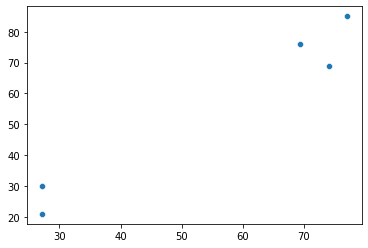

In [9]:
sns.scatterplot(x=Lr.predict(X_test), y= y_test , ) #for Linear regression

In [10]:
rd = RandomForestRegressor()
rd.fit(X_train,y_train)

RandomForestRegressor()

In [11]:
print(f'Train score {rd.score(X_train,y_train)} Test score {rd.score(X_test,y_test)} for Random forest model')

Train score 0.9882126034293864 Test score 0.9169179046185548 for Random forest model


<AxesSubplot:>

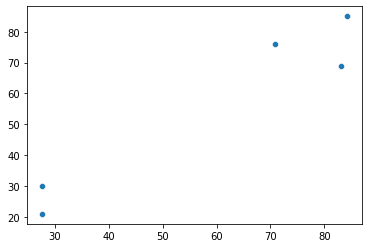

In [12]:
sns.scatterplot(x=rd.predict(X_test), y= y_test)

# Lets use some hyper parameter tuner

In [19]:
Params = { 'n_estimators': [10,20,40,50,100,110,150,120],
    'criterion':["mse", "mae"],
    'min_samples_split':range(1,10),
    'max_features':["auto", "sqrt", "log2"]   
    
    
    
                              }



RD = RandomForestRegressor()

In [20]:
Gr = GridSearchCV(estimator= RD , param_grid= Params ,verbose= 3)

In [21]:
Gr.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=20; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=auto, min_sample

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=10; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=20; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=sqrt, min_samples_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END criterion=mse, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=sqrt, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=sqrt, min_samples_spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END criterion=mse, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END criterion=mse, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END criterion=mse, max_features=log2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END criterion=mse, max_features=log2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END criterion=mse, max_features=log2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END criterion=mse, max_features=log2, min_samples_spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=auto, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=auto, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=auto, min_sample

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=40; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=sqrt, min_samples_spl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 4/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=110; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 1/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 2/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=sqrt, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=sqrt, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=sqrt, min_samples_s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=50; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=110; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 3/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=150; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

[CV 5/5] END criterion=mae, max_features=log2, min_samples_split=1, n_estimators=120; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 5/5] END criterion=mae, max_features=log2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV 1/5] END criterion=mae, max_features=log2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 2/5] END criterion=mae, max_features=log2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 3/5] END criterion=mae, max_features=log2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV 4/5] END criterion=mae, max_features=log2, min_samples_spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.68662025 0.58768576 0.63495291 0.66440364
 0.64943905 0.6691312  0.63627412 0.66972436 0.70839572 0.72762691
 0.71191231 0.74335163 0.72994216 0.71999498 0.70277305 0.71867899
 0.55152343 0.67528317 0.70979265 0.77559133 0.74127296 0.72121306
 0.75474956 0.75334951 0.79863246 0.75942403 0.78167198 0.73262027
 0.73837807 0.7259595  0.74389369 0.74384648 0.7359593  0.70242161
 0.74804308 0.71844279 0.67799444 0.70904583 0.73525811 0.71319011
 0.63766505 0.64705007 0.73498414 0.68962784 0.63978212 0.68368505
 0.63944337 0.68956754 0.49975136 0.70602709 0.59715284 0.6197535
 0.65671633 0.61291315 0.58612157 0.64467111 0.62246248 0.46617111
 0.56539917 0.48859758 0.43433134 0.53681712 0.49406109 0.5292054
        nan        nan        nan        nan        nan

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(1, 10),
                         'n_estimators': [10, 20, 40, 50, 100, 110, 150, 120]},
             verbose=3)

In [22]:
Gr.best_estimator_

RandomForestRegressor(max_features='log2', min_samples_split=4, n_estimators=20)

In [24]:
GRR =RandomForestRegressor(max_features='log2', min_samples_split=4, n_estimators=20)
GRR.fit(X_train,y_train)

RandomForestRegressor(max_features='log2', min_samples_split=4, n_estimators=20)

In [27]:
print(f'Train score {GRR.score(X_train,y_train)} Test score {GRR.score(X_test,y_test)} for Random forest model')

Train score 0.9766415819308835 Test score 0.9175046375744934 for Random forest model


<AxesSubplot:>

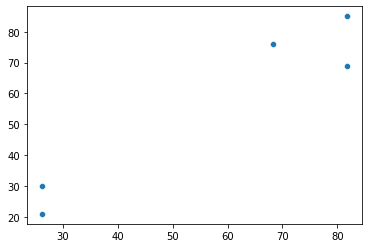

In [28]:
sns.scatterplot(x=GRR.predict(X_test), y= y_test)

# Every model has almost the same r^ for the prediction ,We'll use random forest model

In [54]:
rd.predict(st_sc.transform([[4.5]])) #Predicting for 4.5 hours

array([44.42])

# Student's percentage will be 44.42 if he studies for 4.5 hours